In [1]:
from loading.loadIDS import loadIDS, trainIDS
from loading.loadGAN import load_gan, load_gan_kdd

from generation.generation import generation_fake_data
from training.training_gan import train_gan, train_gan_kdd
from matplotlib import pyplot as plt
import numpy as np
import sys

Using TensorFlow backend.


ModuleNotFoundError: No module named 'gan_loss'

In [ ]:
sys.path

In [ ]:
sys_path = "/Users/ppx/Desktop/gitELECOM/NSL-KDD/loading"
# sys_path = "/home/peseux/Desktop/gitELECOM/NSL-KDD/loading"
sys.path.insert(0, sys_path)
sys_path = "/Users/ppx/Desktop/gitELECOM/NSL-KDD"
# sys_path = "/home/peseux/Desktop/gitELECOM/NSL-KDD/"
sys.path.insert(0, sys_path)
from loadingKDD import loadingKDD

In [ ]:
# Parameters

# DATA
# x_train, y_train, x_test, y_test = loadData(nrows=100000, attacks=True)
attack_mode = None
X, Y, cat_col, colnames = loadingKDD(nrows=2000000, attack_mode=attack_mode, 
                                     attack=None, log_transform=True)
X = X[:1000]
Y = Y[:1000]



In [ ]:
len(colnames)

In [2]:
features = ["num_access_files", "num_shells", "src_bytes", 
            "dst_bytes", "root_shell", "num_root", "su_attempted", 
            "num_file_creations"]

In [3]:
def creating_dico_index(features, colnames):
    output = dict()
    for col in colnames:
        output[col] = [i for i in range(122) if colnames[i] == col][0]
    return output
dico_index = creating_dico_index(features=features, colnames=colnames)

NameError: name 'colnames' is not defined

In [146]:
def CVSS(naf, ns, sb, db, rs, nr,sa,nfc, mini=0.47, maxi = .8):
    access_vector = (naf+2.1)/2.2
    attack_complexity = (ns+2.1)*(sb+db+3.1)/7.2
    authentification = (rs+nr+2.1)*(2+sa)/4.2
    conf_impact = (naf+2.1)/2.2
    int_impact = (nfc+2.1)/2.2
    availibility_impact = (sb+db+2.1)/4.2
    exploitability = 50 * access_vector*attack_complexity*authentification
    impact =  1-(1-conf_impact)*(1-int_impact)*(1-availibility_impact)
    
    return min(max(1 -((impact*.5 +exploitability) - mini)/(maxi-mini),0),1)

def score_line(x, dico_index):
    values = dict()
    for feature in dico_index:
        values[feature] = x[dico_index[feature]]
    score = CVSS(naf=values["num_access_files"], 
                 ns=values["num_shells"], 
                 sb=values["src_bytes"], 
                 db=values["dst_bytes"], 
                 rs=values["root_shell"], 
                 nr=values["num_root"],
                 sa=values["su_attempted"],
                 nfc=values["num_file_creations"])
    return score

In [147]:
scores1 = [score_line(x=x, dico_index=dico_index) for x, y in zip(X,Y) if y == 1]
scores0 = [score_line(x=x, dico_index=dico_index) for x, y in zip(X,Y) if y == 0]
print(sorted(scores0[-10:]))
scores0 = [s for s in scores0 if s<1]

[0, 0.48403577123588426, 0.5049467714694482, 0.5483427310234019, 0.5484787931649495, 0.5780729429378328, 0.5968063208367327, 0.856366385102225, 0.9757295173961837, 0.9757295173961837]


In [148]:
max(scores0)

0.9757295173961837

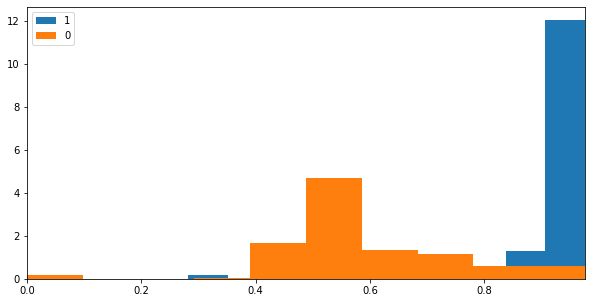

In [149]:
plt.figure(figsize=(10,5))
plt.hist(scores1, label="1", density=True)
plt.hist(scores0, label="0", density=True)
plt.xlim(0,max(scores0+ scores1))
plt.legend()
plt.show()

In [111]:
sys.path

['/Users/ppx/Desktop/gitELECOM/NSL-KDD',
 '/Users/ppx/Desktop/gitELECOM/NSL-KDD/loading',
 '/Users/ppx/Desktop/gitELECOM/IDSGAN/losses/',
 '',
 '/Users/ppx/anaconda3/lib/python36.zip',
 '/Users/ppx/anaconda3/lib/python3.6',
 '/Users/ppx/anaconda3/lib/python3.6/lib-dynload',
 '/Users/ppx/.local/lib/python3.6/site-packages',
 '/Users/ppx/anaconda3/lib/python3.6/site-packages',
 '/Users/ppx/anaconda3/lib/python3.6/site-packages/Sphinx-1.5.1-py3.6.egg',
 '/Users/ppx/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/ppx/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/ppx/.ipython']